In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
D = 3
N = 1e8
true_nlist = [1.5, 3, 6, 12, 24]
m = 2/3
nlist = [round(tnn/(1-m)-1, 4) for tnn in true_nlist]
s = 1.0
sc = 1.0
c = s / sc
L = 1.0
num_empty = 100
res_dir = 'nsc-setisaturday-numempty100'
randix = 0

n=1.5 	 mean origin time: 26.21
n=3 	 mean origin time: 16.03
n=6 	 mean origin time: 14.33
n=12 	 mean origin time: 13.94
n=24 	 mean origin time: 13.84
0
1
2
3
4
0
1
2
3
4


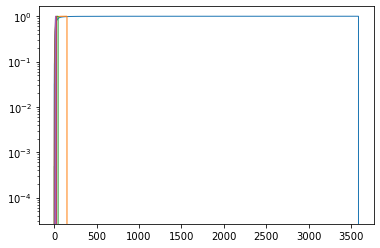

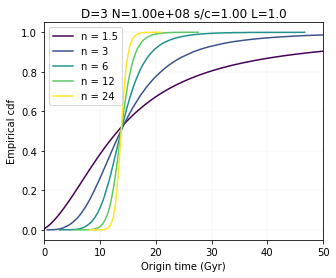

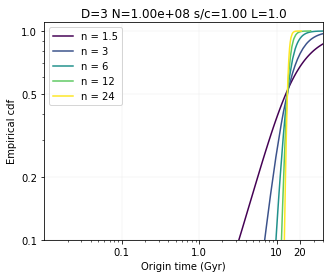

In [16]:
plot_data = []
cmap = plt.get_cmap('viridis')
mycols = cmap(np.linspace(0, 1, len(nlist)))
for nix, n in enumerate(nlist):
    fout = (
        f"{res_dir}/D={D}_n={float(n)}_N={N:.2e}_"
        f"s={s:.1f}_L={L:.1f}_c={c:.5e}_r={randix}"
    )
    res = pd.read_csv(fout+'.csv')
    res_years = pd.read_csv(fout+'_years.csv')
    #display(res.head())
    #display(res_years.head())
    #print(res.shape)
    #print(res_years.shape)
    #plt.figure()
    (counts, bins, patches) = plt.hist(
        res_years.OriginTime, cumulative=True, histtype='step', density=True, log=True, bins=res.shape[0])
    plot_data.append((bins[0:-1], counts))
    print(f"n={true_nlist[nix]} \t mean origin time: {res_years.OriginTime.mean():.2f}")
fig = plt.figure(figsize=(5,4))
for nix, truen in enumerate(true_nlist):
    print(nix)
    (bins, counts) = plot_data[nix]
    plt.plot(bins, counts, '-', color=mycols[nix])
plt.gca().set_xlim(1, 50)
leg = [f"n = {nn}" for nn in true_nlist]
plt.gca().set_ylabel('Empirical cdf')
plt.gca().set_xlabel('Origin time (Gyr)');
plt.gca().set_title(f'D={D} N={N:.2e} s/c={s/c:.2f} L={L:.1f}');
plt.gca().set_xticks([0, 10, 20, 30, 40, 50])
plt.gca().set_xticklabels([0, 10, 20, 30, 40, 50])
plt.legend(leg);
plt.grid(linewidth=0.1);
fig.savefig('figures-friday/plotA.png', dpi=200);

fig = plt.figure(figsize=(5,4))
for nix, truen in enumerate(true_nlist):
    print(nix)
    (bins, counts) = plot_data[nix]
    plt.plot(bins, counts, '-', color=mycols[nix])
plt.gca().set_xlim(-1, 50)
leg = [f"n = {nn}" for nn in true_nlist]
plt.gca().set_ylabel('Empirical cdf')
plt.gca().set_xlabel('Origin time (Gyr)');
plt.gca().set_title(f'D={D} N={N:.2e} s/c={s/c:.2f} L={L:.1f}');
plt.legend(leg)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.gca().set_xlim(0.01, 40)
plt.gca().set_ylim(0.1, 1.1)
plt.gca().set_yticks([0.1, 0.2, 0.5, 1.0])
plt.gca().set_yticklabels(['0.1', '0.2', '0.5', '1.0'])
plt.gca().set_xticks([0.1, 1.0, 10, 20])
plt.gca().set_xticklabels(['0.1', '1.0', '10', '20'])
plt.grid(linewidth=0.1);
fig.savefig('figures-friday/plotA-loglog.png', dpi=200);